In [2]:
from src import utils
imgs, labels = utils.load_imgs('../Wild Cats Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = utils.make_dataset(imgs, labels, utils.label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
# utils.plot_sample(imgs, labels, 5, 5, resize=(224, 224))

Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


Iteration 0:


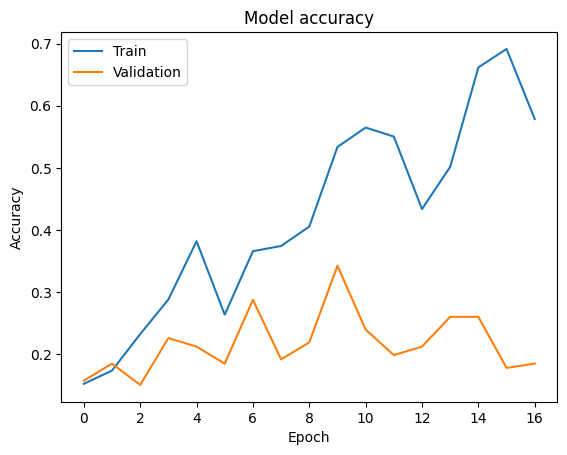

   Accuracy: 24.6914%

Iteration 1:


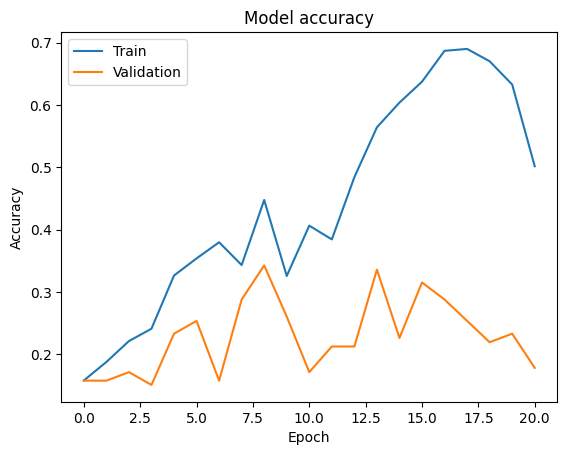

   Accuracy: 30.8642%

Iteration 2:


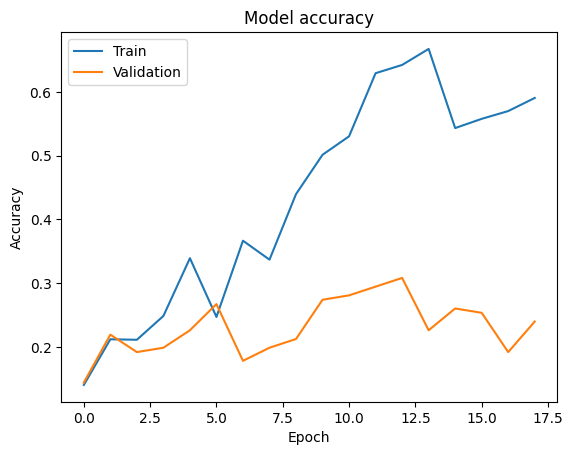

   Accuracy: 27.1605%

Iteration 3:


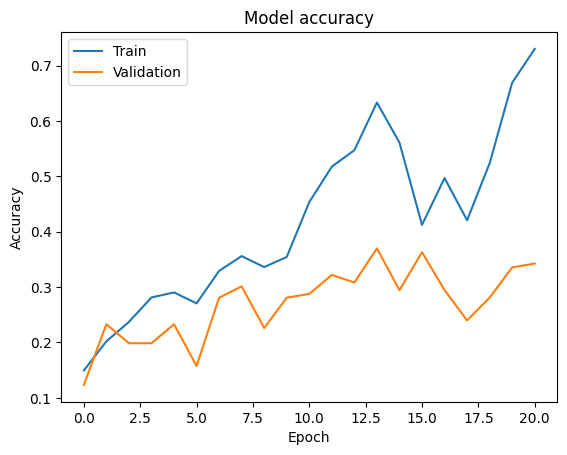

   Accuracy: 30.2469%

Iteration 4:


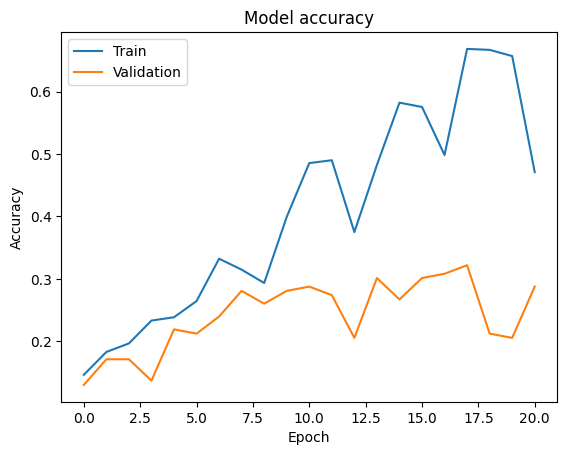

   Accuracy: 33.3333%

Mean accuracy: 0.2926 (+/- 0.0301)
Mean loss: 2.2271 (+/- 0.1927)


In [4]:
from keras.src.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit
from src import utils
import numpy as np

X = x / 255
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=0, restore_best_weights=True)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
split = sss.split(X, y)

accuracy_scores = []
loss_scores = []

for i, (train_index, test_index) in enumerate(split):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Iteration {i}:")

    network = utils.create_FFNN()
    # Train model on current fold's training data
    history = network.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=0)

    utils.plot_history(history)

    # Evaluate model on current fold's test data
    loss, accuracy = network.evaluate(x_test, y_test, verbose=0)
    print("   Accuracy: {:.4f}".format(accuracy * 100) + "%\n")

    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

# Calculate the mean and standard deviation of the evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_loss = np.mean(loss_scores)
std_accuracy = np.std(accuracy_scores)
std_loss = np.std(loss_scores)

# Print the mean and standard deviation of the evaluation metrics
print("Mean accuracy: {:.4f} (+/- {:.4f})".format(mean_accuracy, std_accuracy))
print("Mean loss: {:.4f} (+/- {:.4f})".format(mean_loss, std_loss))